# HEINZ NON- PROFIT ANALYTICS - GROUP 8 
DATA SCRAPING FROM TED.COM

Part 1:
1. Scraping from Ted website (pages 1 to 77)
2. Get Data from each of those pages which had talks given in 2017
3. Merge it with Data downloaded from Dataworld.io
4. Use tweepy library and Twitter API to get follower count of few speakers
5. Merge all together and write to file.


In [565]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
from matplotlib.pyplot import pie, axis, show
import wordcloud
from bs4 import BeautifulSoup
import requests
import re
import csv
import time
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
import warnings
from pylab import rcParams
import tweepy



In [ ]:
finalResult = []

for i in range(1,77):
    comments = requests.get('https://www.ted.com/talks?page='+str(i)+'&sort=newest')
    comments = comments.content
    soup = bs(comments, 'html.parser')
    
   
    linkset = soup.find('div',{'class':'results'}).find_all('div',{'class':'col'})
    
    links = []
    for i in range(0,len(linkset)):
        temp = linkset[i].find_all('span',{'class':'meta__val'})
        if len(temp)==2:
            str1 = temp[0].text.strip('\n')
            str2 = temp[1].text.strip('\n')
            links.append([str1,str2])
        else:
            links.append(['NA','NA'])
    
    name_links = []
    for i in range(0,len(linkset)):
        temp = linkset[i].find_all('a',{'class':' ga-link'}, text = True)    
        name_links.append([temp[0]['href'],temp[0].text.strip('\n')])

    for i in range(0,len(name_links)):
        if '2017'in links[i][0]:
            finalResult.append(['https://www.ted.com'+name_links[i][0],name_links[i][1],links[i][0],links[i][1]])
    
    time.sleep(5)

datasource0 = pd.DataFrame(columns=['URL', 'Title', 'Date', 'Tags'],)    
datasource1 = pd.DataFrame(columns=['Title', 'Author', 'Views'],)

with open("links_required.csv",'w',newline='') as resultFile:
        wr = csv.writer(resultFile, dialect='excel')
        wr.writerows(finalResult)
        
       

In [ ]:
datasource0=pd.read_csv("links_required.csv", encoding = "ISO-8859-1", header=None)
for i in range(0, len(datasource0)):
    print(i)
    a = requests.get(datasource0.iloc[i][0])
    soup = bs(a.text, "html.parser")
    span = soup.find_all("span")
    views = span[4].text.replace("\n", "").replace("\t", "").replace(" views", "")
    b = soup.find_all("title")
    titleandauthor = b[0].text.split(":")
    author = titleandauthor[0]
    title = titleandauthor[1].split("|")[0]
    datasource1.loc[i]=[title,author,views]
    time.sleep(4)

    
datasource1.to_csv('datasourceMain1.csv',header=False, sep=',')

datasource_withTags=pd.read_csv("links_required.csv", encoding = "ISO-8859-1", header=None)
datasource_withViews=pd.read_csv("datasourceMain1.csv", encoding = "ISO-8859-1", header=None)

tempfinal = pd.concat([datasource_withTags, datasource_withViews], axis = 1)
final = tempfinal.iloc[:,[1,2,3,4,6,7]]
final.to_csv('Ted_Clean.csv',header = False, sep = ',')

############################################################################################

df_raw_mainPage= pd.DataFrame(columns=['Raw Source'],)  

for i in range(1,77):
    comments = requests.get('https://www.ted.com/talks?page='+str(i)+'&sort=newest')
    comments = comments.content
    soup = bs(comments, 'html.parser')
    df_raw_mainPage.loc[i]=[soup]
    
print(df_raw_mainPage)
df_raw_mainPage.to_csv('ted_raw_mainPage1.csv',header=False, sep=',')

###########################################################################################


datasource_fromDownloaded_CSV=pd.read_csv("Ted_Trasncript_CSV.csv", encoding = "ISO-8859-1",dtype='unicode',low_memory=False)
trasncriptDF = final.merge(datasource_fromDownloaded_CSV, left_on='Title',right_on='Title', how='right')
trasncriptDF.to_csv('ted_merged_transcript1.csv',header=False, sep=',')

    


In [ ]:
#Variables that contains the user credentials to access Twitter API 
access_token = "795931597308444673-PVeafBP9DBm3dizz5bYnSucbSp7r6Kx"
access_token_secret = "H2IdimURTKCWZHOeihnwcWmiHHEVUu8KgQCLiM9nKdXXR"

consumer_key = "QUOEqeQurX0jE6Rw3p9UYKSUc"
consumer_secret = "kruSQBAUJjQt7qciL1nhCVTA52cbPp0MZlrzwkl4uAtCijgPB0"
speakers=['elonmusk','iamsrk','meganphelps','anilkseth','tferriss', 'AdamMGrant', 'EmEsfahaniSmith', 'Sue_Klebold']
followerCount=pd.DataFrame(columns=['Speaker', 'TwitterFollowersCount'],)
speakerids=[]

# Tweepy OAuthHandler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

targets=[]

for i in range(0, len(speakers)):
    user = api.get_user(screen_name = speakers[i])
    userProfile = api.get_user(user.id)
    followerCount.loc[i]=[userProfile.name, userProfile.followers_count]
    print(userProfile.name, userProfile.followers_count)

followerCount.to_csv('TwitterApi_FollowerCount.csv', header=False, sep=',')

# Part 2 - Exploratory Data Analysis

Load Data Files from the DataFiles.xlsx file, from various tabs into the appropriate data frame





In [670]:
xlsx = pd.ExcelFile('DataFiles.xlsx',encoding = "ISO-8859-1",dtype='unicode')
df_perTalk = pd.read_excel(xlsx, 5)
warnings.filterwarnings('ignore')
csfont = {'fontname':'Helvetica', 'size':'16'}


Find the Maximum Tags reported for talks in the year 2017

                      index  Tags
0    Inspiring, Informative    44
1    Informative, Inspiring    42
2  Informative, Fascinating    41
3     Inspiring, Courageous    29
4   Informative, Persuasive    24
5      Inspiring, Beautiful    19
6      Beautiful, Inspiring    16
AxesSubplot(0.125,0.125;0.775x0.755)


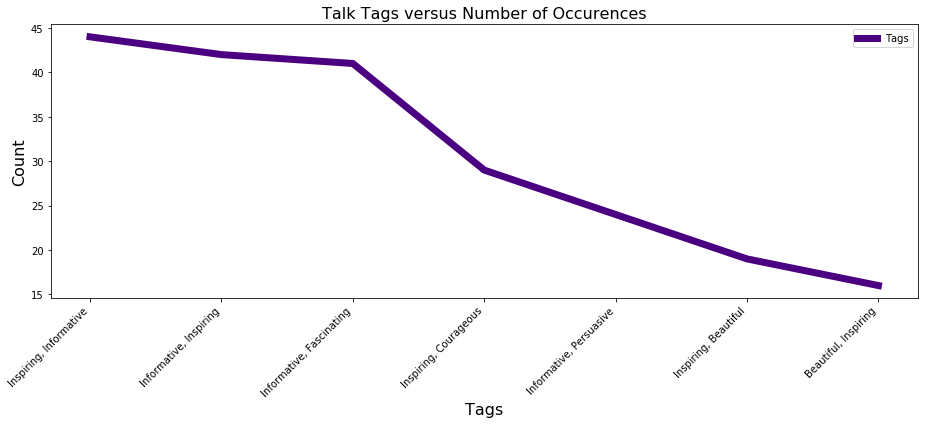

In [609]:
tags_counts = df_perTalk['Tags'].value_counts()
top_tags_counts = tags_counts.head(7)
df=top_tags_counts.to_frame().reset_index()
print(df)


plot1=df.plot(color="indigo", figsize= (13, 6), kind='line', linewidth=7, )
plot1.set_xticklabels(df.iloc[:,0], rotation=45, ha="right")
plot1.set_xticks(np.arange(len(df.iloc[:,0])))
plot1.set_xlabel('Tags', **csfont)
plot1.set_ylabel('Count', **csfont)
plot1.set_title('Talk Tags versus Number of Occurences', **csfont)

print(plot1)

# We find that "Inspiring and Informative" Speeches had the highest count in 2017.

Now, let us group the speeches by the tags based on the avergae number of views for the video on the website.

                                 Views
Tags                                  
Beautiful, Courageous     9.925295e+05
Beautiful, Fascinating    9.329233e+05
Beautiful, Inspiring      1.093667e+06
Courageous, Informative   1.012293e+06
Courageous, Inspiring     1.467966e+06
Fascinating, Funny        8.358300e+05
Fascinating, Informative  1.839953e+06


Text(0.5,1,'Talk Tags versus Number of Views of Video')

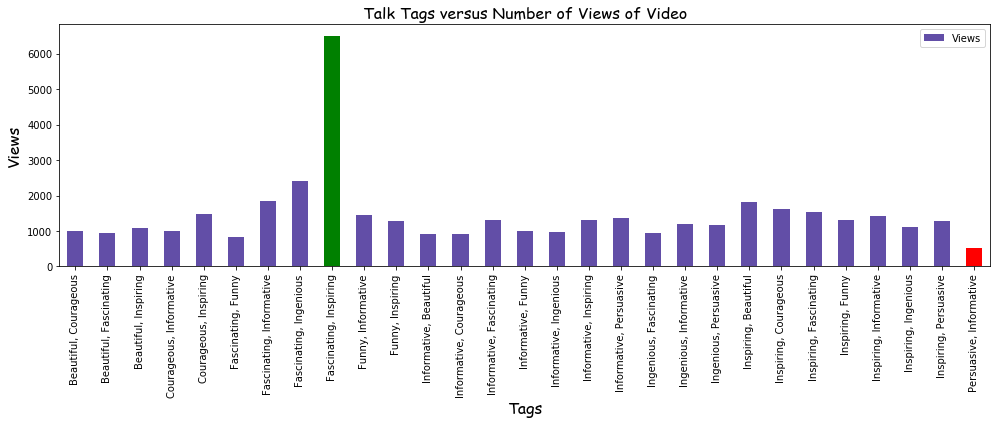

In [724]:
views_byTags = df_perTalk.groupby('Tags').agg({'Views':'mean'})
print(views_byTags.dropna().head(7))
views_byTags['Views']=views_byTags['Views']/1000
colors = ['#624ea7', 'orange', '#624ea7', 'green', 'maroon']

views_byTags=views_byTags.dropna()

ax = views_byTags.plot(kind='bar', color=colors, legend=False, figsize= (14, 6))

for bar in ax.patches:
    bar.set_facecolor('#624ea7')

highlight = 'Fascinating, Inspiring'
pos = views_byTags.index.get_loc(highlight)
ax.patches[pos].set_facecolor('green')
highlight = 'Persuasive, Informative'
pos = views_byTags.index.get_loc(highlight)
ax.patches[pos].set_facecolor('red')
ax.legend()
ax.set_xlabel('Tags', **csfont)
ax.set_ylabel('Views', **csfont)
ax.set_title('Talk Tags versus Number of Views of Video', **csfont)

# We see that talks with the tag "Fascinating and Inspiring" have received an exorbidant number of views when compared to the other tags that succeed it. "Persuasive and Informative" Talks have received the least number of views.

To investigate the reason behind the Fascinating and Inspiring Talks, let us look at the transcript of the talks that feel under this category. We first simulate a word cloud followed by sentiment analyis.

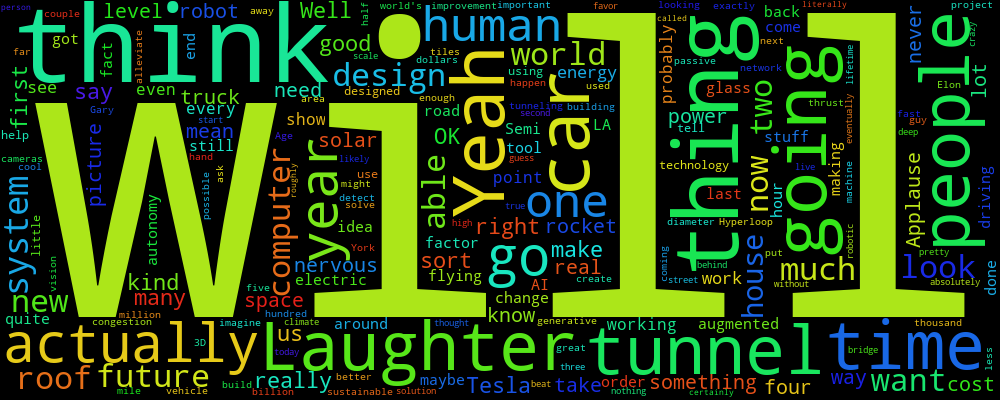

In [566]:
df_withTranscript_2017 = pd.read_excel(xlsx, 7)
transcript_fascinating_inspiring= df_withTranscript_2017.loc[df_withTranscript_2017['Tags'] == 'Fascinating, Inspiring', 'Tag Words']
mergedTranscript= pd.DataFrame(transcript_fascinating_inspiring)
transcript_for_wordcloud= ""
mergedTranscript = list(mergedTranscript["Tag Words"])


for i in range(len(mergedTranscript)):
    transcript_for_wordcloud=transcript_for_wordcloud+" "+mergedTranscript[i]
    

from wordcloud import WordCloud

r= transcript_for_wordcloud.replace("EM", "").replace("CA","")
wc = WordCloud(width=1000,height=400).generate(re.sub(r"\s+"," ", r))
wc.to_image()




We see that the word cloud has the following words highlighted:
# "Will" , "think", "going", "future", "Laughter", "Yeah" 

These words are indicative of the fact that the speech was indeed motivating and had a positive connotation by making use of a good blend of inspirational and funny components.

# Sentiment Analysis

We shall now calcualte the sentiment for the transcripts of the speeches using a simple NaiveBayesClassfier approach. The dictionary of positive and negative words are sourced from the WordDcitionary.xlsx file and stored in the positive_vocab and negative_vocab data frames. The training features are the formed based on the vocabulary and the transcript is then classfied based on the words that are encountered. The function thus returns a negative and positive sentiment value as tuple.


In [671]:
xl_wordDict= pd.ExcelFile('Word_Dictionary.xlsx',encoding = "ISO-8859-1",dtype='utf-8')
wordlist=pd.read_excel(xl_wordDict,0)

In [704]:

def create_dictionary(word):
    return dict([(word, (True))])

 
positive_vocab = list(wordlist.loc[wordlist['Sentiment'] == 'positive', 'Word'].dropna())
negative_vocab = list(wordlist.loc[wordlist['Sentiment'] == 'negative', 'Word'].dropna())

positive_features = [(create_dictionary(pos), 'pos') for pos in positive_vocab]
negative_features = [(create_dictionary(neg), 'neg') for neg in negative_vocab]
neutral_features = [(create_dictionary(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 

def generateSentiment(r):
    
    # Predict
    neg = 0
    pos = 0
    sentence = r.lower()
    words = sentence.split(' ')
    for word in words:
        classResult = classifier.classify(create_dictionary(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1

    return str(float(pos)/len(words)), str(float(neg)/len(words))



     Transcript     Score Sentiment
0  Transcript 1  0.856559  Positive
1  Transcript 1  0.080653  Negative
2  Transcript 2  0.848307  Positive
3  Transcript 2  0.086589  Negative


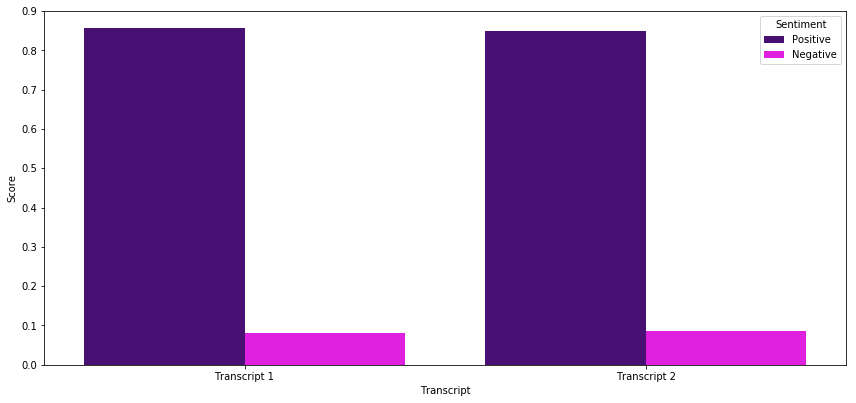

In [723]:
import seaborn as sea# sentiment_Fascinating_Df= pd.DataFrame()
sentiment_Fascinating_Df=pd.DataFrame(columns=['Transcript', 'Score', 'Sentiment'])
sentiment_Fascinating_Df.loc[0]=['Transcript 1', generateSentiment(mergedTranscript[0])[0],'Positive']
sentiment_Fascinating_Df.loc[1]=['Transcript 1', generateSentiment(mergedTranscript[0])[1],'Negative']
sentiment_Fascinating_Df.loc[2]=['Transcript 2', generateSentiment(mergedTranscript[1])[0],'Positive']
sentiment_Fascinating_Df.loc[3]=['Transcript 2', generateSentiment(mergedTranscript[1])[1],'Negative']

sentiment_Fascinating_Df['Score']=sentiment_Fascinating_Df['Score'].astype(np.float64)
print(sentiment_Fascinating_Df)

colors=['indigo','fuchsia', 'green']
sea.barplot(x="Transcript", y="Score", hue="Sentiment",data=sentiment_Fascinating_Df, palette=colors, )

sea.set_style({'font.family':'Helvetica', 'font.serif':'Arial'})
plt.rcParams['figure.figsize']=(14,6)




Text(0,0.5,'')

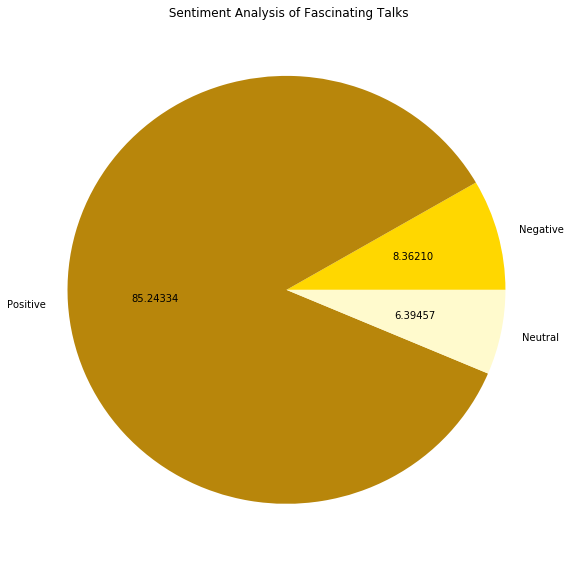

In [706]:
colors=['gold','darkgoldenrod', 'lemonchiffon']
sums = sentiment_Fascinating_Df.Score.groupby(sentiment_Fascinating_Df.Sentiment).mean()
sums.loc['Neutral']=1-(sums.iloc[0]+sums.iloc[1])
piechart=sums.plot.pie(figsize=(8,8), title=' Sentiment Analysis of Fascinating Talks',autopct='%.5f', colors=colors, labels=['Negative', 'Positive','Neutral'])
piechart.set_ylabel('')

The above graphs show us that the Fascinating Talks had a high Positive Sentiment and a very less negative sentiment attached to the trasncripts. 

# Tag based Sentiment Analysis

Now let us group the tags and look at their Sentiment Score.

In [707]:
Positive_Sentiment=[]
Negative_Sentiment=[]
NetSentiment=[]

for item in df_withTranscript_2017['Tag Words']:
    Positive_Sentiment.append(generateSentiment(item)[0])
    Negative_Sentiment.append(generateSentiment(item)[1])

df_withTranscript_2017['Positive Sentiment']=Positive_Sentiment
df_withTranscript_2017['Positive Sentiment']=df_withTranscript_2017['Positive Sentiment'].astype(np.float64)
df_withTranscript_2017['Negative Sentiment']=Negative_Sentiment
df_withTranscript_2017['Negative Sentiment']=df_withTranscript_2017['Negative Sentiment'].astype(np.float64)



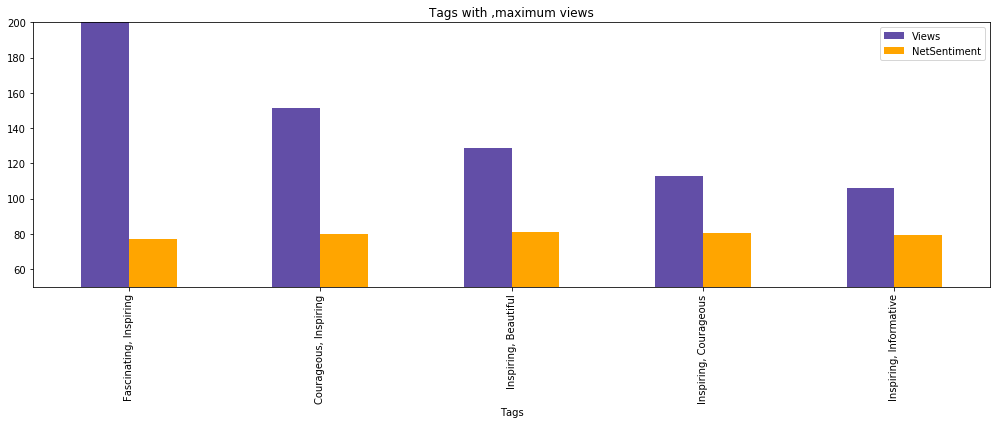

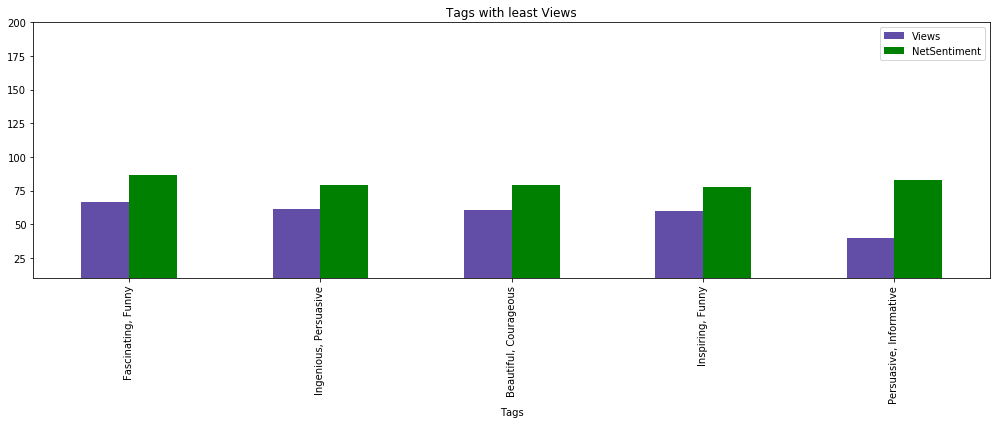

In [722]:

sentiment_byTags = df_withTranscript_2017.groupby('Tags').agg({'Positive Sentiment':'mean', 'Negative Sentiment':'mean', 'date_published':'mean'})
sentiment_byTags['Positive Sentiment']=sentiment_byTags['Positive Sentiment']*100
sentiment_byTags['Negative Sentiment']=sentiment_byTags['Negative Sentiment']*100
sentiment_byTags['Views']=sentiment_byTags['date_published']/10000
sentiment_byTags['NetSentiment']=sentiment_byTags['Positive Sentiment']-sentiment_byTags['Negative Sentiment']

colors = ['#624ea7', 'orange', '#624ea7', 'green', 'maroon']

sentiment_byTags[['Views','NetSentiment']].sort_values('Views',ascending=False).head(5).plot.bar(color=colors,figsize=(14,6), title='Tags with ,maximum views', ylim=(50,200))
sentiment_byTags[['Views','NetSentiment']].sort_values('Views',ascending=False).tail(5).plot.bar(color=colors[2:],figsize=(14,6), title='Tags with least Views',ylim=(10,200))

# An interesting observation is that talks that the least number of views had a very high Net Sentiment i.e. Net Sentiment >85 where as talks with the Highes views had a net sentiment lesser than <75.

This drives us to the conclusion that talks that narrate the hardships (which contributed to the lower net sentiment value) that speaker faced could inspire people more than talks that just gave monotonous information which did not have a significant impact on the audience.

2018-10-17    32
2018-08-17    30
2018-11-17    30
2018-09-17    27
2018-03-17    24
2018-12-17    23
2018-05-17    22
2018-04-17    22
2018-02-17    21
2018-01-17    20
2018-06-17    19
2018-07-17    16
Name: Date, dtype: int64
AxesSubplot(0.125,0.2;0.775x0.68)


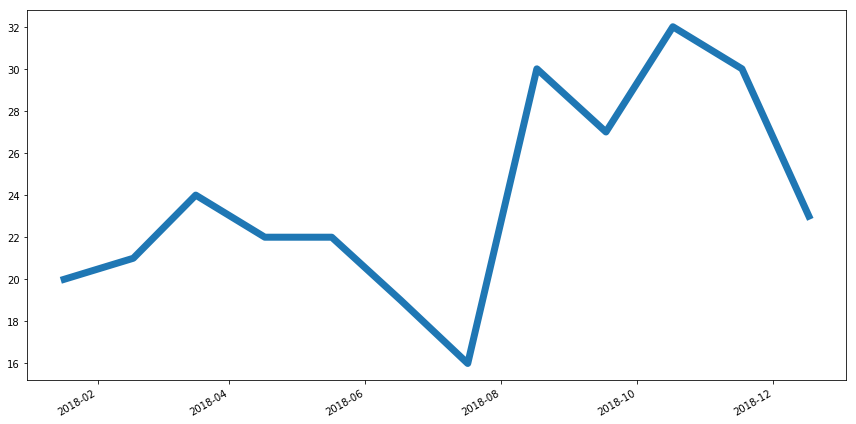

In [713]:
date_df = df_perTalk.sort_values(by=['Date'])
count_date_df = date_df['Date'].value_counts()
print(count_date_df)
print(count_date_df.plot(linewidth=7, figsize=(12,6)))


# Social Media Analysis

Now lets group the speakers with the maximum views and look at how their twitter follower count impacts their views

                Speaker  Follower Count      Views
0             Elon Musk      21289582.0  9704367.0
1        Shah Rukh Khan      34929626.0  6167864.0
2    Megan Phelps-Roper         51284.0  5556303.0
3             Anil Seth         11432.0  4628181.0
4           Tim Ferriss       1545374.0  4574226.0
5            Adam Grant        151676.0  4292685.0
6  Emily Esfahani Smith          7423.0  3849023.0
7           Sue Klebold           119.0  3792197.0
AxesSubplot(0.125,0.125;0.775x0.755)


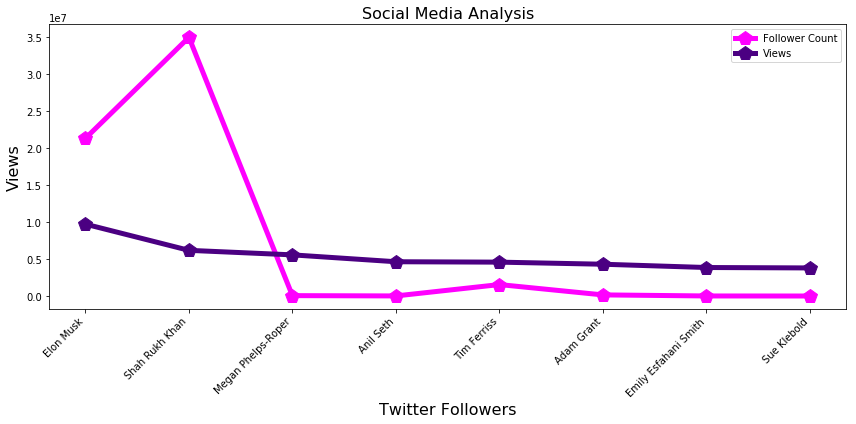

In [714]:
views_date = df_withTranscript_2017.groupby('duration').agg({'date_published':'sum','Positive Sentiment':'mean', 'Negative Sentiment':'mean'})
views_speaker = df_perTalk.groupby('Speaker').agg({'Views':'sum'})

top_speakers = views_speaker.sort_values(by=['Views'],ascending=False)
top_speakers.rename(index=str, columns={"Speaker": "Speaker", "Views": "views"})
df_twitter = pd.read_excel(xlsx, 8)

requireddf=df_twitter.merge(df_perTalk, left_on='Speaker', right_on='Speaker', how='outer')
requireddf= requireddf.filter(['Speaker','Follower Count','Views'], axis=1).head(8)
print(requireddf)

requireddf['Follower Count']=requireddf['Follower Count'].astype(np.float64)
requireddf['Views']=requireddf['Views'].astype(np.float64)
# requireddf.plot.line(figsize= (8, 6), color=colors)

csfont = {'fontname':'Helvetica', 'size':'16'}

plot3=requireddf.plot(color=["fuchsia","indigo","green"], figsize= (12, 6), kind='line', marker='p', linewidth=5, markersize=15)
plot3.set_xticklabels(requireddf.iloc[:,0], rotation=45, ha="right")
plot3.set_xticks(np.arange(len(requireddf.iloc[:,0])))

plot3.set_xlabel('Twitter Followers', **csfont,)
plot3.set_ylabel('Views',**csfont,)
plot3.set_title('Social Media Analysis' ,**csfont,)
print(plot3)

  Event Type Count       Views
0       Tedx    43   95.398621
1        Ted    75  101.178105


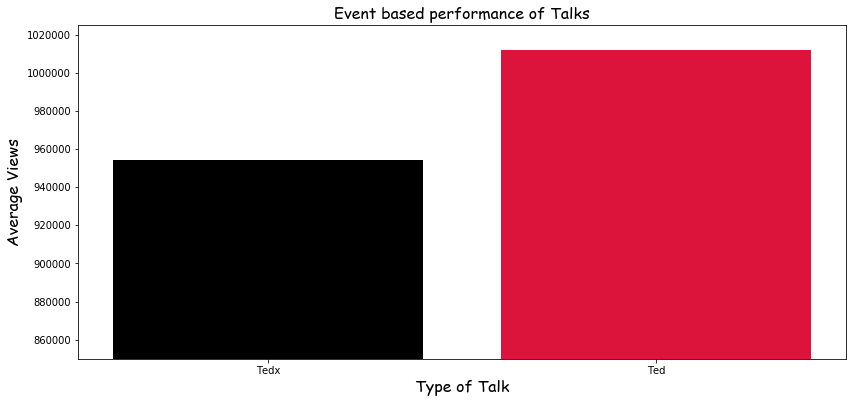

In [716]:

df_transcript = pd.read_excel(xlsx, 7)
type = df_transcript['year_filmed']
#print(type)
tedx = 0
ted = 0
view1=0
view2=0
for i in range(0,len(type)):
    if 'TEDx' in type[i]:
        tedx = tedx + 1
        view1=view1+df_transcript.iloc[i]['date_published']
    else:
        ted = ted + 1
        view2=view2+df_transcript.iloc[i]['date_published']

event_df= pd.DataFrame(columns=['Event Type','Count','Views'])
event_df.loc[0]=['Tedx',tedx, view1/tedx/10000]
event_df.loc[1]=['Ted', ted, view2/ted/10000]

print(event_df)
csfont = {'fontname':'Comic Sans MS', 'size':'16'}
hfont = {'fontname':'Helvetica'}

plt.bar(['Tedx', 'Ted'],[view1/tedx, view2/ted], color=['black', 'crimson'])
plt.ylim(850000,1025000)
plt.xlabel('Type of Talk', **csfont,)
plt.ylabel('Average Views',**csfont,)
plt.title('Event based performance of Talks' ,**csfont,)

# plt.figure(figsize=(3,3))
rcParams['figure.figsize'] = 12,5.7



AxesSubplot(0.125,0.125;0.775x0.755)


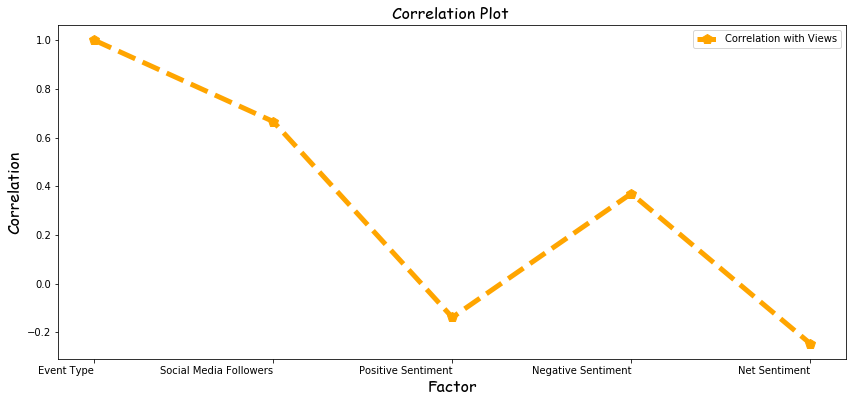

In [719]:
event_df['Count']=event_df['Count'].astype(np.float64)
event_df['Views']=event_df['Views'].astype(np.float64)
event_df['Count'].corr(event_df['Views'])
data = event_df[['Count','Views']]
event_correlation = data.corr(method='pearson')

data = requireddf[['Follower Count','Views']]
twitter_correlation = data.corr(method='pearson')


data = sentiment_byTags[['Positive Sentiment','Negative Sentiment','NetSentiment','Views']]
sentiment_correlation = data.corr(method='pearson')


correlationdf=pd.DataFrame(columns=['Factor', 'Correlation with Views'])
correlationdf.loc[0]=['Event Type', event_correlation.Count[0]]
correlationdf.loc[1]=['Social Media Followers', twitter_correlation.Views[0]]
correlationdf.loc[2]=['Positive Sentiment', sentiment_correlation.Views[0]]
correlationdf.loc[3]=['Negative Sentiment', sentiment_correlation.Views[1]]
correlationdf.loc[4]=['Net Sentiment', sentiment_correlation.Views[2]]

plot4=correlationdf.plot(kind='line', linewidth=5, marker='p', markersize='10',color='orange', linestyle='dashed')

plot4.set_xticklabels(correlationdf.iloc[:,0], rotation=0, ha="right")
plot4.set_xticks(np.arange(len(correlationdf.iloc[:,0])))

plot4.set_xlabel('Factor', **csfont,)
plot4.set_ylabel('Correlation',**csfont,)
plot4.set_title('Correlation Plot ' ,**csfont,)
print(plot4)
